In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# step 0 -> prepare dataset
x_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
print(type(x_np))
x = torch.from_numpy(x_np.astype(np.float32))
print(type(x))
y = torch.from_numpy(y_np.astype(np.float32))
print(y.size())
y = y.view(-1, 1) # 100 elements
print(y.size()) # 100 rows, 1 col
n_samples, n_features = x.shape

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
torch.Size([100])
torch.Size([100, 1])


In [3]:
# step 1 -> prepare model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size) # takes 2 arg, inp size & outp size of an example

In [4]:
# step 2 -> loss and optimisers
criterion = nn.MSELoss()
learning_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [5]:
# step 3 -> training loop
# 1) forward pass: compute prediction and loss
# 2) backward pass: gradients
# 3) update weights
def train(n_epochs = 100):
    
    for epoch in range(n_epochs):
        # forward pass and loss
        y_hat = model(x)
        loss = criterion(y_hat,y)

        # backward pass
        loss.backward()

        # update wieghts
        optimiser.step()

        # empty the gradients else thy will be added up
        optimiser.zero_grad()

        if (n_epochs==100 and epoch%10 == 0) or (n_epochs==1000 and epoch%100 == 0):
            print(f'epoch: {epoch}, loss: {loss.item():.4f}')

In [6]:
# plot
def graph():
    
    y_hat = model(x).detach() # detach to make requires_grad = false
    plt.plot(x,y,'ro')
    plt.plot(x,y_hat,'b')
    plt.show()

epoch: 0, loss: 5888.8936
epoch: 10, loss: 4355.9717
epoch: 20, loss: 3248.9084
epoch: 30, loss: 2448.4363
epoch: 40, loss: 1869.0012
epoch: 50, loss: 1449.1334
epoch: 60, loss: 1144.5990
epoch: 70, loss: 923.5210
epoch: 80, loss: 762.8979
epoch: 90, loss: 646.1100


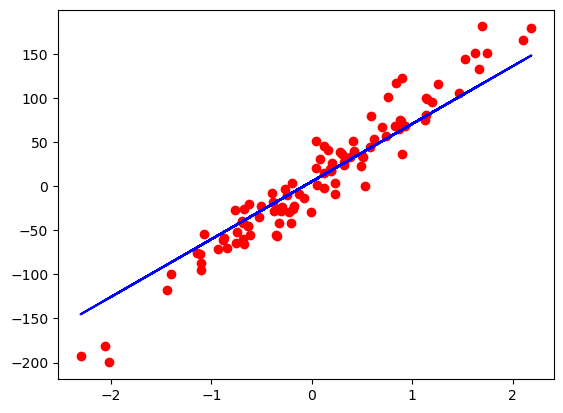

In [7]:
train(100)
graph()

epoch: 0, loss: 561.1357
epoch: 100, loss: 342.4536
epoch: 200, loss: 333.0038
epoch: 300, loss: 332.5869
epoch: 400, loss: 332.5685
epoch: 500, loss: 332.5676
epoch: 600, loss: 332.5675
epoch: 700, loss: 332.5676
epoch: 800, loss: 332.5676
epoch: 900, loss: 332.5676


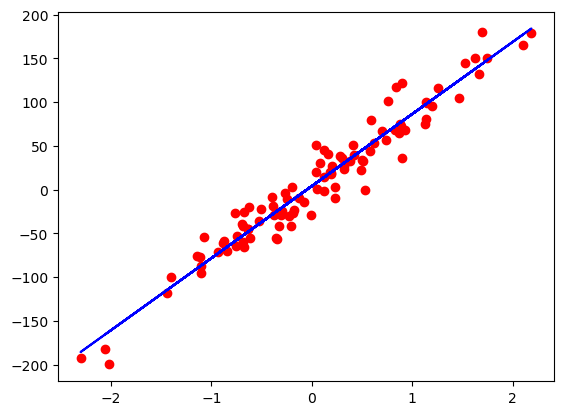

In [8]:
train(1000)
graph()